In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\utsav\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load dataset
df = pd.read_csv("Normalized_Dataset.csv")
X = df.drop(columns=["crop_yield"])
y = df["crop_yield"]

In [4]:
# Split data into train-val-test (60-20-20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)


In [5]:
# Define models and hyperparameters
model_grid = {
    "RandomForest": (RandomForestRegressor(random_state=42), {
        "n_estimators": [100, 200],
        "max_depth": [5, 10, None]
    }),
    "AdaBoost": (AdaBoostRegressor(random_state=42), {
        "n_estimators": [30, 40],
        "learning_rate": [0.05, 0.1, 0.2]
    }),
    "GradientBoosting": (GradientBoostingRegressor(random_state=42), {
        "n_estimators": [30, 40],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    }),
    "XGBoost": (XGBRegressor(objective='reg:squarederror', random_state=42), {
        "n_estimators": [30, 40],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    }),
    "SVR": (SVR(), {
        "C": [0.1, 1, 10],
        "epsilon": [0.1, 0.2]
    }),
    "Ridge": (Ridge(random_state=42), {
        "alpha": [0.1, 1.0, 10.0]
    }),
    "Lasso": (Lasso(random_state=42), {
        "alpha": [0.01, 0.1, 1.0]
    }),
    "LinearRegression": (LinearRegression(), {})
}

In [8]:
# Identify categorical columns (example)
cat_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Prepare features and target
X = df_encoded.drop(columns=['crop_yield'])
y = df_encoded['crop_yield']

# Now split and train as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# One-hot encode categorical columns
cat_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Split
X_train_full, X_test, y_train_full, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Use X_train and X_test (already encoded) in all training and SHAP


In [17]:
import xgboost as xgb
print(xgb.__version__)


2.1.4


[0]	train-rmse:0.25021	eval-rmse:0.24072
[1]	train-rmse:0.22608	eval-rmse:0.21748
[2]	train-rmse:0.20438	eval-rmse:0.19652
[3]	train-rmse:0.18497	eval-rmse:0.17790
[4]	train-rmse:0.16752	eval-rmse:0.16101
[5]	train-rmse:0.15183	eval-rmse:0.14601
[6]	train-rmse:0.13776	eval-rmse:0.13249
[7]	train-rmse:0.12500	eval-rmse:0.12028
[8]	train-rmse:0.11375	eval-rmse:0.10986
[9]	train-rmse:0.10336	eval-rmse:0.10000
[10]	train-rmse:0.09434	eval-rmse:0.09159
[11]	train-rmse:0.08591	eval-rmse:0.08364
[12]	train-rmse:0.07836	eval-rmse:0.07663
[13]	train-rmse:0.07179	eval-rmse:0.07060
[14]	train-rmse:0.06596	eval-rmse:0.06544
[15]	train-rmse:0.06039	eval-rmse:0.06026
[16]	train-rmse:0.05543	eval-rmse:0.05569
[17]	train-rmse:0.05101	eval-rmse:0.05169
[18]	train-rmse:0.04725	eval-rmse:0.04831
[19]	train-rmse:0.04373	eval-rmse:0.04515
[20]	train-rmse:0.04065	eval-rmse:0.04255
[21]	train-rmse:0.03807	eval-rmse:0.04029
[22]	train-rmse:0.03564	eval-rmse:0.03815
[23]	train-rmse:0.03341	eval-rmse:0.03632
[2

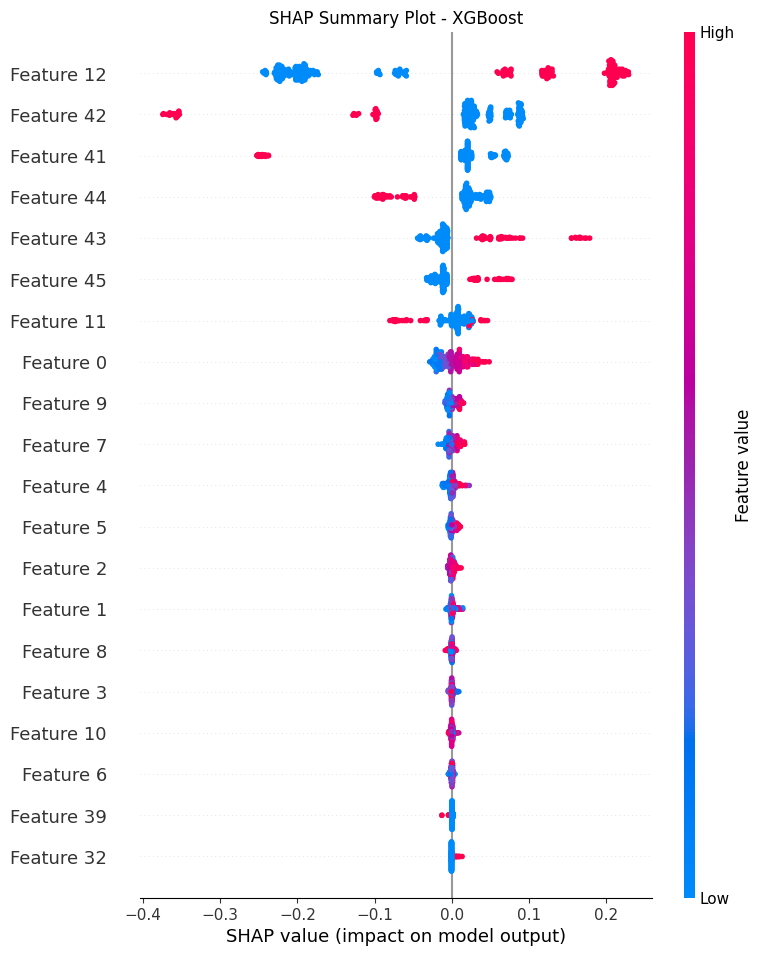

In [20]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Normalized_Dataset.csv")

# One-hot encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Prepare features and target
X = df_encoded.drop(columns=['crop_yield']).values
y = df_encoded['crop_yield'].values

# Split data into train-val-test (60-20-20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Convert to DMatrix (required by old XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'eta': 0.1,
    'seed': 42
}

# Train model with early stopping
evals = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

# Predict
y_pred = model.predict(dtest)

# Evaluate performance
print(f"Test R2: {r2_score(y_test, y_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Explain with SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot - XGBoost")
plt.show()


In [21]:
import pickle

# Save
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Load
with open("xgb_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


Test R2: 0.9909
Test MAE: 0.0137
Test RMSE: 0.0261


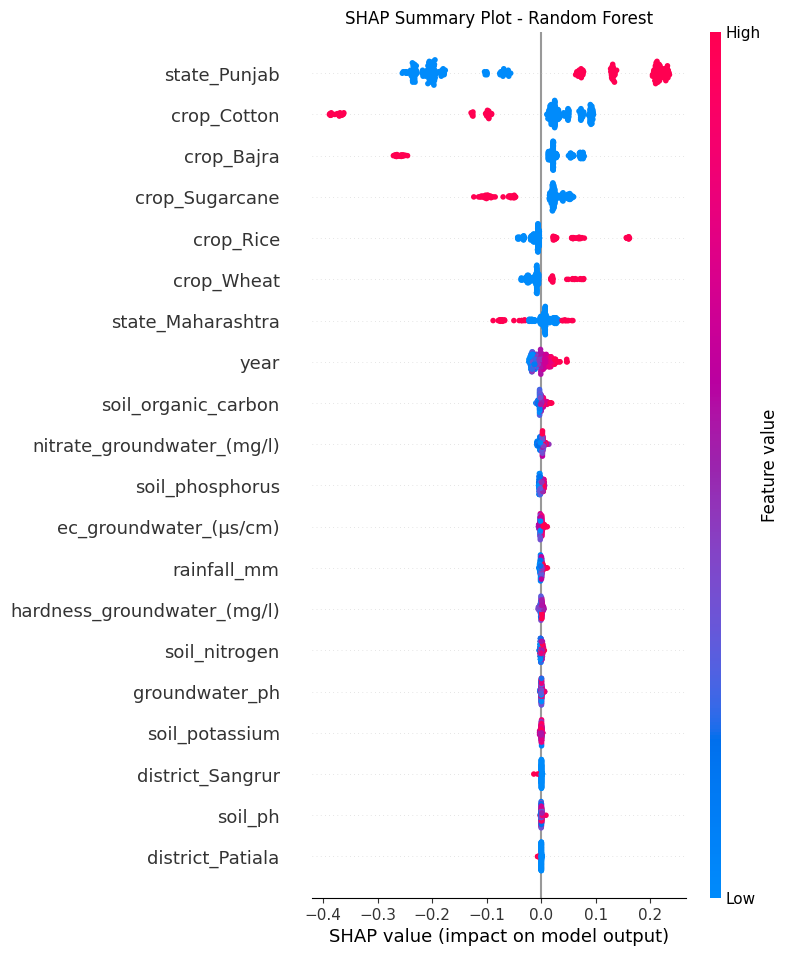

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import matplotlib.pyplot as plt
import pickle

# Load dataset
df = pd.read_csv("Normalized_Dataset.csv")

# One-hot encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Prepare features and target
X = df_encoded.drop(columns=['crop_yield'])
y = df_encoded['crop_yield']

# Split data into train-val-test (60-20-20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Define Random Forest model
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
print(f"Test R2: {r2_score(y_test, y_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Explain model predictions with SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot - Random Forest")
plt.show()

# Save model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(model, f)


Test R2: 0.9875
Test MAE: 0.0175
Test RMSE: 0.0306


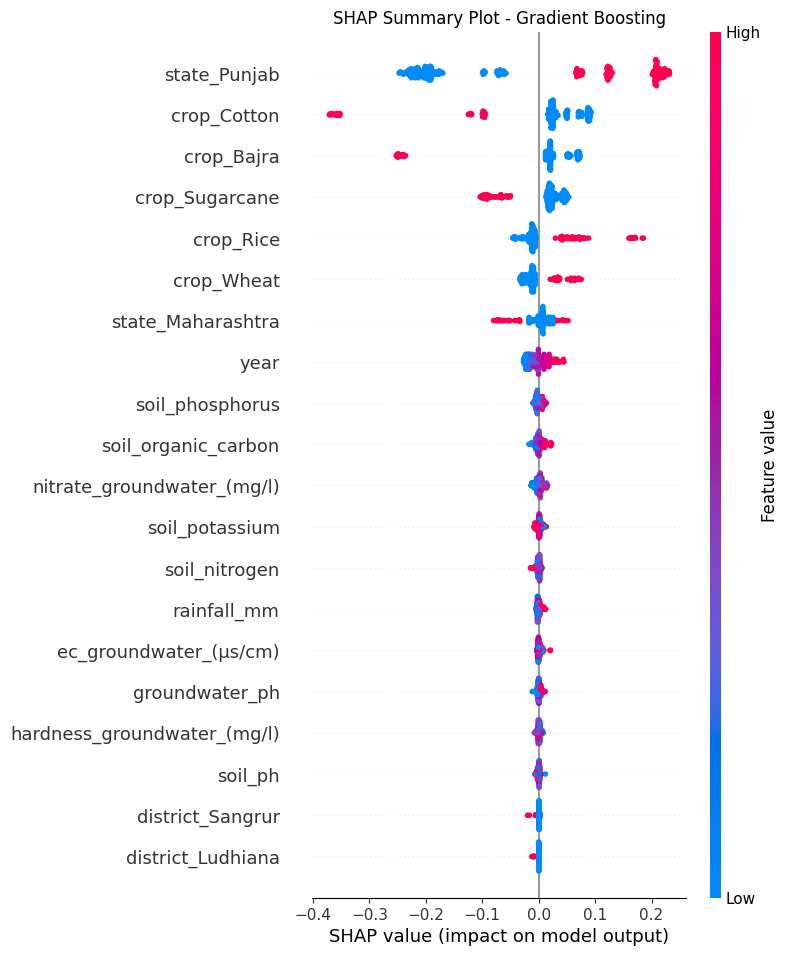

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import matplotlib.pyplot as plt
import pickle

# Load dataset
df = pd.read_csv("Normalized_Dataset.csv")

# One-hot encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Prepare features and target
X = df_encoded.drop(columns=['crop_yield'])
y = df_encoded['crop_yield']

# Split data into train-val-test (60-20-20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Define Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
print(f"Test R2: {r2_score(y_test, y_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Explain model predictions with SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot - Gradient Boosting")
plt.show()

# Save model
with open("gbr_model.pkl", "wb") as f:
    pickle.dump(model, f)


Test R2: 0.7698
Test MAE: 0.1060
Test RMSE: 0.1314


c:\Users\utsav\anaconda3\envs\myenv\lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


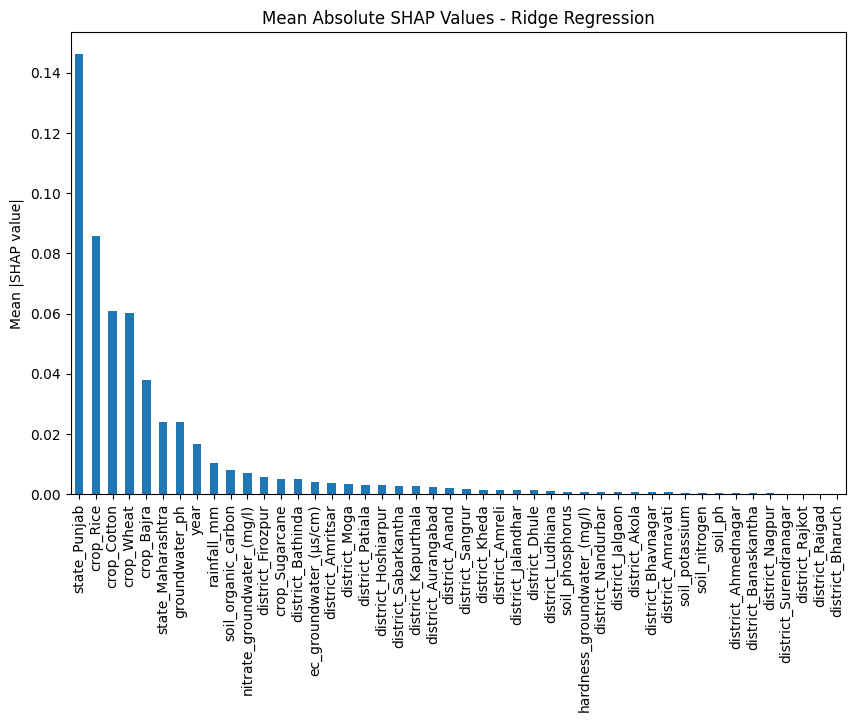

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import matplotlib.pyplot as plt
import pickle

# Load dataset
df = pd.read_csv("Normalized_Dataset.csv")

# One-hot encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Prepare features and target
X = df_encoded.drop(columns=['crop_yield'])
y = df_encoded['crop_yield']

# Split data into train-val-test (60-20-20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Define Ridge Regression
model = Ridge(alpha=1.0, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
print(f"Test R2: {r2_score(y_test, y_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Explain model predictions with SHAP
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

# Convert SHAP values to DataFrame for plotting
shap_df = pd.DataFrame(np.abs(shap_values), columns=X_test.columns)
mean_shap = shap_df.mean().sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
mean_shap.plot(kind='bar')
plt.title("Mean Absolute SHAP Values - Ridge Regression")
plt.ylabel("Mean |SHAP value|")
plt.show()

# Save model
with open("ridge_model.pkl", "wb") as f:
    pickle.dump(model, f)


Validation Set:
R2: 0.8589
MAE: 0.0839
RMSE: 0.0986

Test Set:
R2: 0.8727
MAE: 0.0847
RMSE: 0.0977


100%|██████████| 50/50 [02:55<00:00,  3.50s/it]


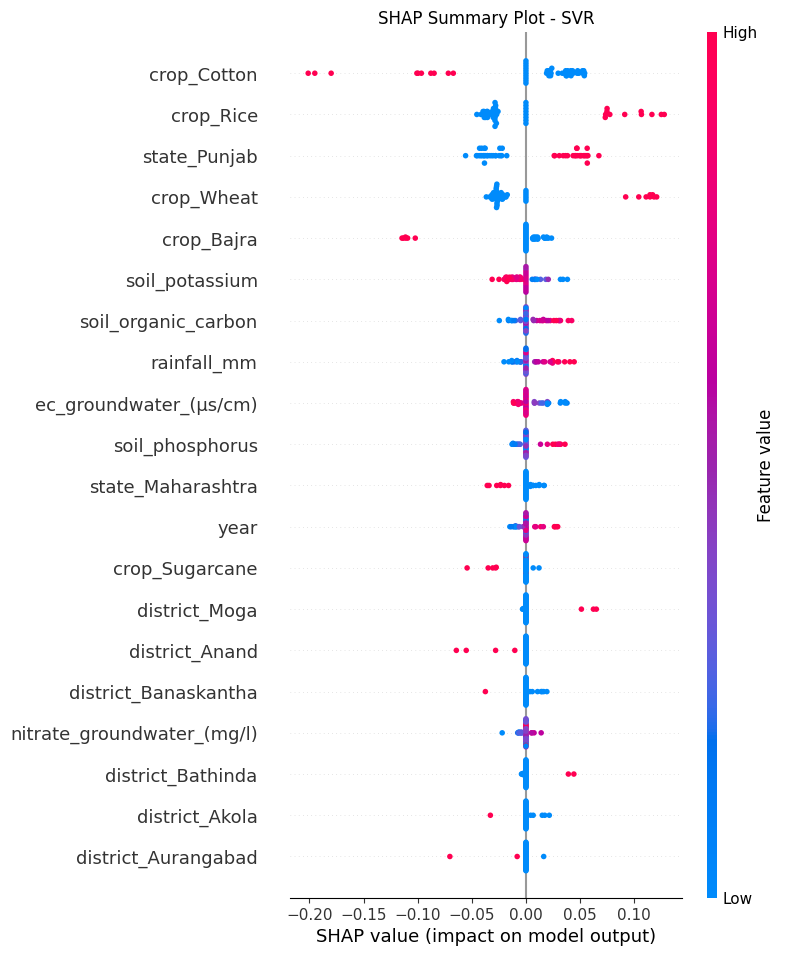

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import matplotlib.pyplot as plt
import pickle

# Load dataset
df = pd.read_csv("Normalized_Dataset.csv")

# One-hot encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Prepare features and target
X = df_encoded.drop(columns=['crop_yield'])
y = df_encoded['crop_yield']

# Split data into train-val-test (60-20-20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Feature scaling (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# Define SVR model with RBF kernel
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')

# Train model
svr_model.fit(X_train_scaled, y_train)

# Predict on validation and test sets
y_val_pred = svr_model.predict(X_val_scaled)
y_test_pred = svr_model.predict(X_test_scaled)

# Evaluate performance
print("Validation Set:")
print(f"R2: {r2_score(y_val, y_val_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_val, y_val_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred)):.4f}")

print("\nTest Set:")
print(f"R2: {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

# SHAP explanation using KernelExplainer (slower for SVR)
# Use a small sample for background to speed up computation
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]
explainer = shap.KernelExplainer(svr_model.predict, background)
shap_values = explainer.shap_values(X_test_scaled[:50])  # explain first 50 test samples

# Plot SHAP summary
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test.iloc[:50], feature_names=X_test.columns, show=False)
plt.title("SHAP Summary Plot - SVR")
plt.show()

# Save model and scaler
with open("svr_model.pkl", "wb") as f:
    pickle.dump({'model': svr_model, 'scaler': scaler}, f)


Validation Set:
R2: 0.9928
MAE: 0.0153
RMSE: 0.0223

Test Set:
R2: 0.9879
MAE: 0.0162
RMSE: 0.0301


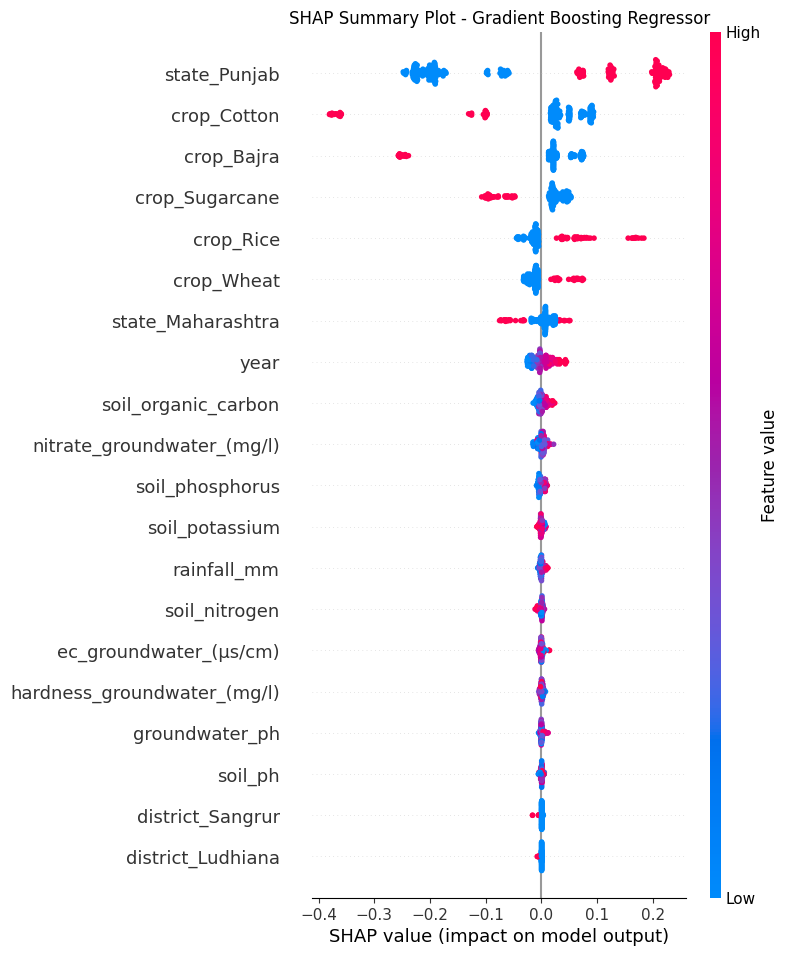

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import matplotlib.pyplot as plt
import pickle

# Load dataset
df = pd.read_csv("Normalized_Dataset.csv")

# One-hot encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Prepare features and target
X = df_encoded.drop(columns=['crop_yield'])
y = df_encoded['crop_yield']

# Split data into train-val-test (60-20-20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Define Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(
    n_estimators=500,       # number of boosting rounds
    learning_rate=0.05,     # smaller learning rate for better generalization
    max_depth=5,            # depth of each tree
    subsample=0.8,          # stochastic gradient boosting
    random_state=42
)

# Train model
gbr_model.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = gbr_model.predict(X_val)
y_test_pred = gbr_model.predict(X_test)

# Evaluate performance
print("Validation Set:")
print(f"R2: {r2_score(y_val, y_val_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_val, y_val_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred)):.4f}")

print("\nTest Set:")
print(f"R2: {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

# SHAP explanation using TreeExplainer (fast for tree models)
explainer = shap.TreeExplainer(gbr_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.title("SHAP Summary Plot - Gradient Boosting Regressor")
plt.show()

# Save model
with open("gbr_model.pkl", "wb") as f:
    pickle.dump(gbr_model, f)


Validation Set:
R2: 0.8977
MAE: 0.0598
RMSE: 0.0840

Test Set:
R2: 0.8897
MAE: 0.0611
RMSE: 0.0909


100%|██████████| 50/50 [00:22<00:00,  2.19it/s]


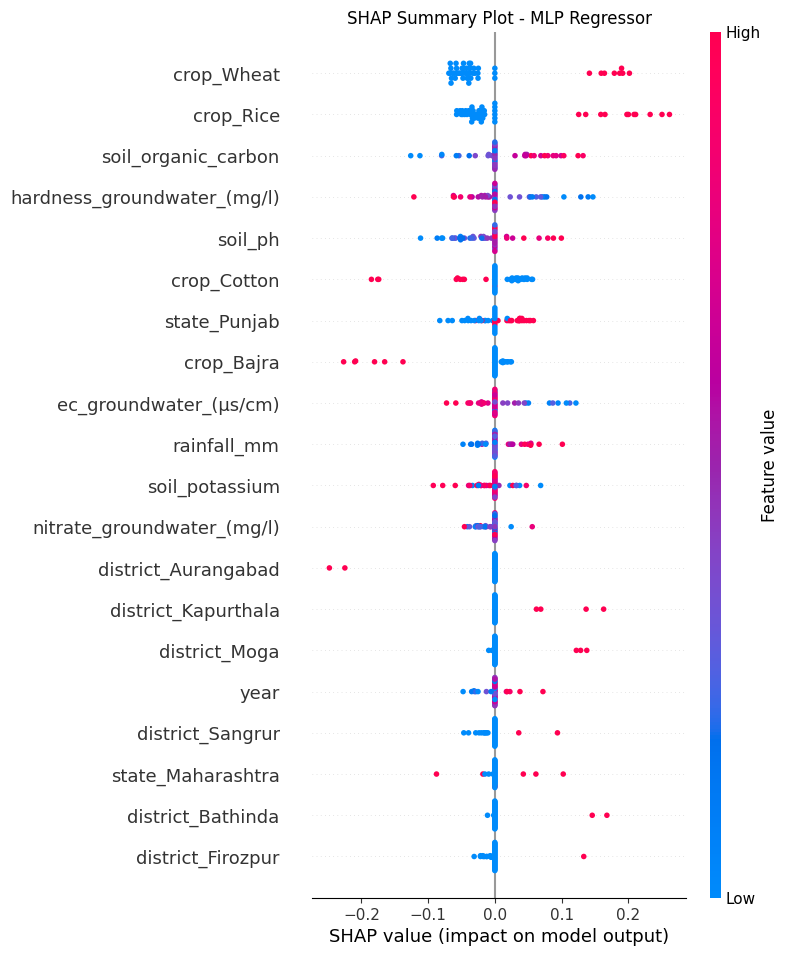

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import matplotlib.pyplot as plt
import pickle

# Load dataset
df = pd.read_csv("Normalized_Dataset.csv")

# One-hot encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Prepare features and target
X = df_encoded.drop(columns=['crop_yield'])
y = df_encoded['crop_yield']

# Split data into train-val-test (60-20-20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Feature scaling (important for MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# Define MLP Regressor
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

# Train model
mlp_model.fit(X_train_scaled, y_train)

# Predict on validation and test sets
y_val_pred = mlp_model.predict(X_val_scaled)
y_test_pred = mlp_model.predict(X_test_scaled)

# Evaluate performance
print("Validation Set:")
print(f"R2: {r2_score(y_val, y_val_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_val, y_val_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_val_pred)):.4f}")

print("\nTest Set:")
print(f"R2: {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

# SHAP explanation using KernelExplainer (slower for neural networks)
# Use a small background sample for speed
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]
explainer = shap.KernelExplainer(mlp_model.predict, background)

# Explain first 50 test samples
shap_values = explainer.shap_values(X_test_scaled[:50])

# Plot SHAP summary
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test.iloc[:50], feature_names=X_test.columns, show=False)
plt.title("SHAP Summary Plot - MLP Regressor")
plt.show()

# Save model and scaler
with open("mlp_model.pkl", "wb") as f:
    pickle.dump({'model': mlp_model, 'scaler': scaler}, f)


0:	learn: 0.2648746	test: 0.2549015	best: 0.2549015 (0)	total: 152ms	remaining: 1m 15s
100:	learn: 0.0332496	test: 0.0291669	best: 0.0291669 (100)	total: 2.53s	remaining: 10s
200:	learn: 0.0247926	test: 0.0255018	best: 0.0254926 (195)	total: 4.62s	remaining: 6.87s
300:	learn: 0.0208647	test: 0.0242550	best: 0.0242550 (300)	total: 6.73s	remaining: 4.45s
400:	learn: 0.0181918	test: 0.0236634	best: 0.0236634 (400)	total: 8.9s	remaining: 2.2s
499:	learn: 0.0159027	test: 0.0231749	best: 0.0231749 (499)	total: 11.3s	remaining: 0us

bestTest = 0.02317488171
bestIteration = 499

Test Set Performance:
R2: 0.9897
MAE: 0.0161
RMSE: 0.0278


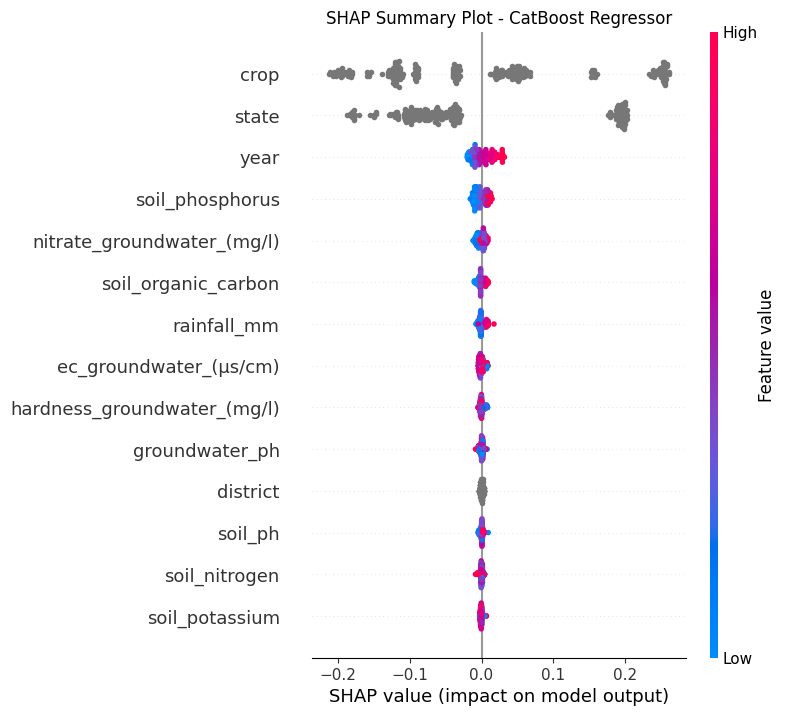

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import catboost as cb
import shap
import matplotlib.pyplot as plt
import pickle

# Load dataset
df = pd.read_csv("Normalized_Dataset.csv")

# Identify categorical columns (CatBoost can handle them directly)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Prepare features and target
X = df.drop(columns=['crop_yield'])
y = df['crop_yield']

# Split data into train-val-test (60-20-20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Define CatBoost Regressor
cat_model = cb.CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

# Train model with validation set
cat_model.fit(X_train, y_train, cat_features=cat_cols, eval_set=(X_val, y_val), early_stopping_rounds=20)

# Predict on test set
y_test_pred = cat_model.predict(X_test)

# Evaluate performance
print("Test Set Performance:")
print(f"R2: {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

# SHAP explanation using TreeExplainer
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.title("SHAP Summary Plot - CatBoost Regressor")
plt.show()

# Save model
cat_model.save_model("catboost_model.pkl")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1586
[LightGBM] [Info] Number of data points in the train set: 709, number of used features: 14
[LightGBM] [Info] Start training from score 0.421983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

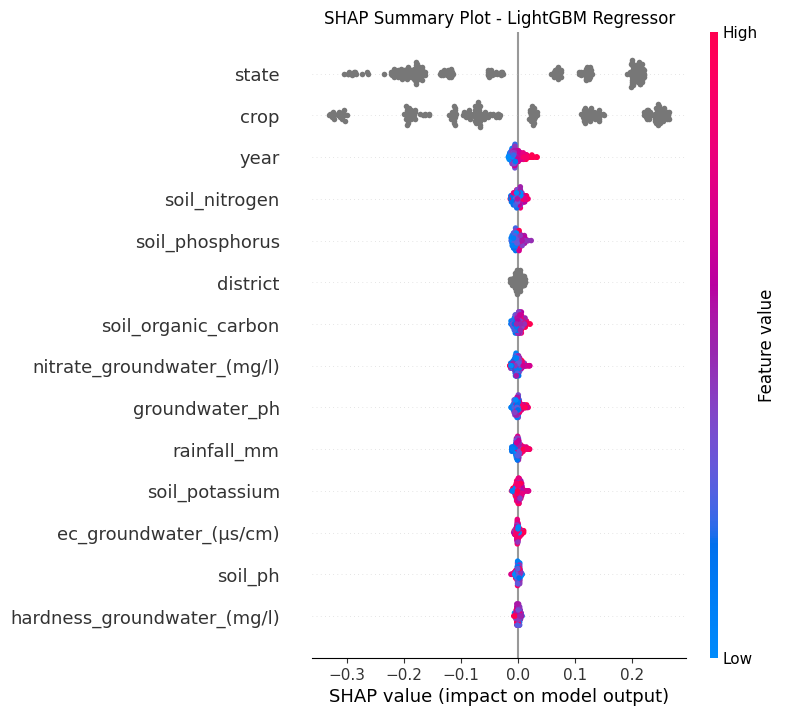

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import pickle

# Load dataset
df = pd.read_csv("Normalized_Dataset.csv")

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Prepare features and target
X = df.drop(columns=['crop_yield'])
y = df['crop_yield']

# Convert categorical columns to 'category' dtype
for col in cat_cols:
    X[col] = X[col].astype('category')

# Split data into train-val-test (60-20-20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Define LightGBM Regressor
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

# Train model (no verbose, no early stopping)
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    categorical_feature=cat_cols
)

# Predict on test set
y_test_pred = lgb_model.predict(X_test)

# Evaluate performance
print("Test Set Performance:")
print(f"R2: {r2_score(y_test, y_test_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

# SHAP explanation using TreeExplainer
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.title("SHAP Summary Plot - LightGBM Regressor")
plt.show()

# Save model
with open("lgbm_model.pkl", "wb") as f:
    pickle.dump(lgb_model, f)


R2: 0.7694
MAE: 0.1065
RMSE: 0.1315


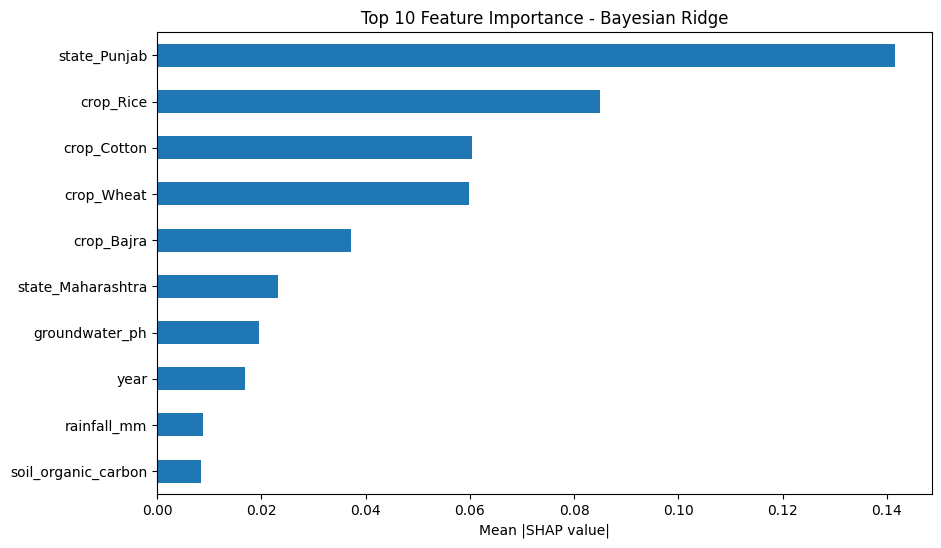

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import matplotlib.pyplot as plt
import pickle

# Load dataset
df = pd.read_csv("Normalized_Dataset.csv")

# One-hot encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Features and target
X = df_encoded.drop(columns=['crop_yield'])
y = df_encoded['crop_yield']

# Train-test split (60-20-20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Bayesian Ridge model
model = BayesianRidge()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print(f"R2: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Convert SHAP values to DataFrame for plotting
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

# Plot top 10 features manually
mean_abs_shap = shap_df.abs().mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,6))
mean_abs_shap.plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel("Mean |SHAP value|")
plt.title("Top 10 Feature Importance - Bayesian Ridge")
plt.show()

# Save model
with open("bayesian_ridge_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from pytorch_tabnet.tab_model import TabNetRegressor
import torch

# -----------------------------
# Load dataset
# -----------------------------
df = pd.read_csv("Normalized_Dataset.csv")
X = df.drop(columns=['crop_yield'])
y = df['crop_yield'].values

# Encode categorical columns
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale numeric features
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X = X.values

# Train-validation-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Reshape for TabNet
y_train_tab = y_train.reshape(-1,1)
y_val_tab   = y_val.reshape(-1,1)
y_test_tab  = y_test.reshape(-1,1)

# -----------------------------
# TabNet Model
# -----------------------------
tabnet_model = TabNetRegressor(
    n_d=32, n_a=32, n_steps=7,
    gamma=1.7,
    n_independent=2, n_shared=2,
    optimizer_params=dict(lr=1e-2),
    scheduler_params={"step_size":50, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    verbose=10,
    device_name='cuda' if torch.cuda.is_available() else 'cpu'
)

tabnet_model.fit(
    X_train, y_train_tab,
    eval_set=[(X_val, y_val_tab)],
    eval_metric=['rmse'],
    max_epochs=500,
    patience=50,
    batch_size=256,
    virtual_batch_size=64,
    num_workers=0,
    drop_last=False
)

# TabNet predictions
y_pred_tab = tabnet_model.predict(X_test).flatten()

# -----------------------------
# Random Forest Model
# -----------------------------
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# -----------------------------
# Ensemble: average predictions
# -----------------------------
y_pred_ensemble = (y_pred_tab + y_pred_rf) / 2

# -----------------------------
# Evaluate ensemble
# -----------------------------
print("Ensemble Performance:")
print(f"R2: {r2_score(y_test, y_pred_ensemble):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ensemble):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ensemble)):.4f}")


c:\Users\utsav\anaconda3\envs\myenv\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.73503 | val_0_rmse: 4.06271 |  0:00:00s
epoch 10 | loss: 0.49506 | val_0_rmse: 0.85156 |  0:00:02s
epoch 20 | loss: 0.49934 | val_0_rmse: 1.07735 |  0:00:04s
epoch 30 | loss: 0.23687 | val_0_rmse: 0.55161 |  0:00:06s
epoch 40 | loss: 0.08864 | val_0_rmse: 0.25419 |  0:00:08s
epoch 50 | loss: 0.05784 | val_0_rmse: 0.27179 |  0:00:09s
epoch 60 | loss: 0.05685 | val_0_rmse: 0.23211 |  0:00:11s
epoch 70 | loss: 0.04988 | val_0_rmse: 0.21711 |  0:00:13s
epoch 80 | loss: 0.05584 | val_0_rmse: 0.20439 |  0:00:15s
epoch 90 | loss: 0.04574 | val_0_rmse: 0.21573 |  0:00:16s
epoch 100| loss: 0.03529 | val_0_rmse: 0.21435 |  0:00:18s
epoch 110| loss: 0.03368 | val_0_rmse: 0.19327 |  0:00:20s
epoch 120| loss: 0.03118 | val_0_rmse: 0.19058 |  0:00:22s
epoch 130| loss: 0.03154 | val_0_rmse: 0.16996 |  0:00:23s
epoch 140| loss: 0.0262  | val_0_rmse: 0.17641 |  0:00:25s
epoch 150| loss: 0.02532 | val_0_rmse: 0.15373 |  0:00:27s
epoch 160| loss: 0.02006 | val_0_rmse: 0.1538  |  0:00:2

c:\Users\utsav\anaconda3\envs\myenv\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Ensemble Performance:
R2: 0.9565
MAE: 0.0405
RMSE: 0.0571


In [57]:
import pytorch_tabular
print(pytorch_tabular.__version__)

1.1.1


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from pytorch_tabular import TabularModel
from pytorch_tabular.models.ft_transformer import FTTransformerConfig
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig
import torch

# Load dataset
df = pd.read_csv("Normalized_Dataset.csv")
X = df.drop(columns=['crop_yield'])
y = df['crop_yield'].values

# Encode categorical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale numeric columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Split data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Prepare DataFrames
train_data = X_train.copy()
train_data['crop_yield'] = y_train
val_data = X_val.copy()
val_data['crop_yield'] = y_val
test_data = X_test.copy()
test_data['crop_yield'] = y_test

# Configurations
data_config = DataConfig(
    target=['crop_yield'],
    continuous_cols=num_cols,
    categorical_cols=cat_cols
)

model_config = FTTransformerConfig(
    task="regression",
    metrics=["r2", "mean_absolute_error", "mean_squared_error"],
    num_heads=8,
    num_attn_blocks=4,
    transformer_head_dim=64,
)

trainer_config = TrainerConfig(
    max_epochs=800,
    batch_size=128,
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    early_stopping=True,
    early_stopping_patience=60,
)

optimizer_config = OptimizerConfig(
    optimizer="AdamW",
)

# Initialize model
ft_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    trainer_config=trainer_config,
    optimizer_config=optimizer_config
)

# Train model
ft_model.fit(
    train=train_data,
    validation=val_data
)

# Predict & Evaluate
y_pred = ft_model.predict(test_data)
y_pred_values = y_pred['prediction'].values.flatten()

print("FT-Transformer Performance:")
print(f"R2: {r2_score(y_test, y_pred_values):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_values):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_values)):.4f}")

# Save model
ft_model.save_model("ft_transformer_model")


2025-10-22 13:21:53,830 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42


2025-10-22 13:21:53,876 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-10-22 13:21:53,885 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

c:\Users\utsav\anaconda3\envs\myenv\lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
c:\Users\utsav\anaconda3\envs\myenv\lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.1240622   0.34363596  1.81133412  1.81133412 -1.1240622   0.34363596
  1.81133412 -1.1240622   0.34363596  0.34363596 

2025-10-22 13:21:53,942 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: FTTransformerModel

2025-10-22 13:21:53,996 - {pytorch_tabular.models.base_model:240} - ERROR - r2 is not a valid functional metric    
defined in the torchmetrics.functional module

AttributeError: module 'torchmetrics.functional' has no attribute 'r2'